**PART 1 - EXPLORATORY DATA ANALYSIS**

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json

import datetime 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_json('logins.json') #load json as a string

In [3]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
data.shape

(93142, 1)

In [6]:
data['counts'] = 0
data.set_index('login_time', inplace=True)  #set the dt column as the index 
#remember inplace=True puts it back in place
time_df = data.resample('15T').count()
time_df.head()
#counts for logins every 15 minutes

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 1.0, 'LogIns at 15 Minute Intervals')

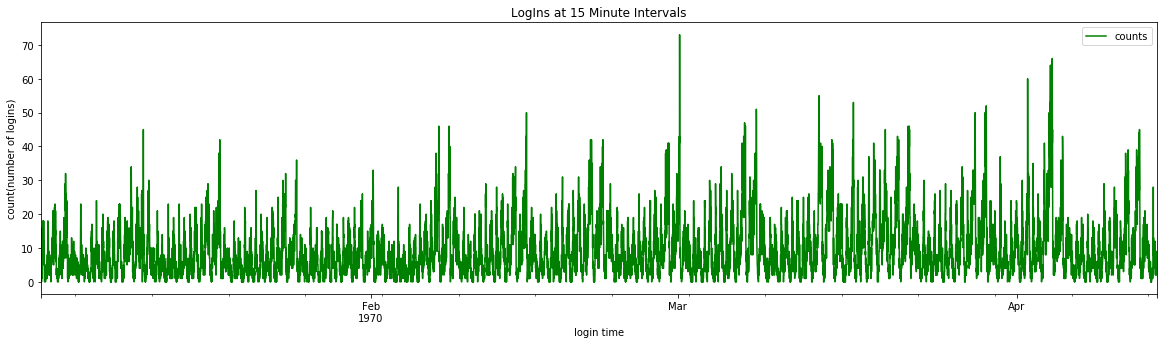

In [7]:
time_df.plot(figsize = (20,5), color='green')
plt.xlabel('login time')
plt.ylabel('count(number of logins)')
plt.title('LogIns at 15 Minute Intervals')

In [8]:
time_df.describe()

,counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


**On average there are approximately 10 logins every 15 minutes.  The median shows 7 logins every 15 minutes.  There are a few outliers that are quite high around 70 logins.  There can be exploration on these exact dates to look for causes on these extremes.  Even those over 50 look to be more of outliers.  Looking at the quartiles or the visual plot, it is apparent the more normal amount of users falls well below those extremes.**  

**Looking at Daily Cycles**

In [9]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
counts    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
time_df = time_df.reset_index()
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time    9788 non-null datetime64[ns]
counts        9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


In [11]:
#weekdays 0, 1, 2, 3, 4, weekend 5,6
time_df['weekday']= time_df['login_time'].dt.day_name() #weekday = dayofweek (alias)
time_df.head()

,login_time,counts,weekday
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [12]:
# groupby('key', as_index=False): key doesn't become index but a column, no need for future reset
dayofweek = time_df.groupby('weekday', as_index=False).sum()
dayofweek
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


Text(0.5, 1.0, 'Logins by Day of Week')

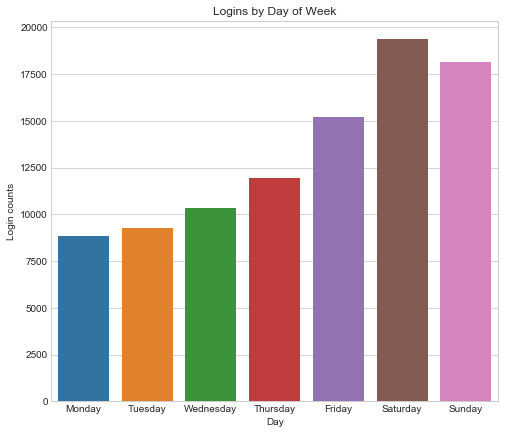

In [13]:
#plot to easily view logins per day of the week
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8,7)) 

sns.barplot(x = 'weekday', y = 'counts', data = dayofweek, order=weekday_order)
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins by Day of Week')

**Daily logins are highest on Saturdays and Sundays indicating more use.
What about then breaking it down by hour in each day?**

In [14]:
time_df['hour'] = time_df['login_time'].dt.hour
time_df.head(5)

,login_time,counts,weekday,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [15]:
#group by the hour for counts
df_hour = time_df.groupby('hour', as_index=False).sum()
df_hour.head()
#as_index = False makes hour not be an index

,hour,counts
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5, 1.0, 'Logins by Hour of Day')

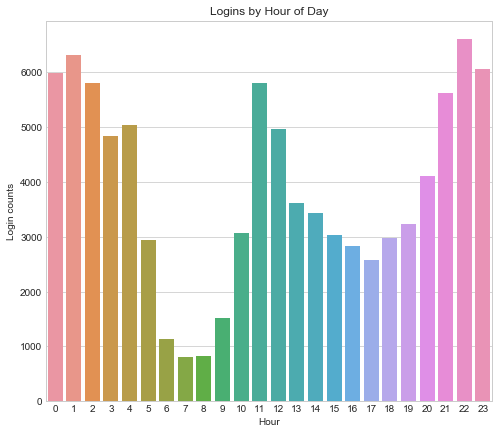

In [16]:
# a visual by hour to report hourly usage no matter the day of the week
fig = plt.figure(figsize=(8,7)) 

sns.barplot(x = 'hour', y = 'counts', data = df_hour)
plt.xlabel('Hour')
plt.ylabel('Login counts')
plt.title('Logins by Hour of Day')


**Peak daytime usage appears to be a more traditional lunchtime of 12pm and 1pm hours.  
The evening usage has 10pm ranking the highest.  
2am appears to be below that, which is the more common time establishments close that are open past midnight in the United States.** 

**Further investigation with the time intervals divided into days could give even more insight into how that varies on particular weekdays or weekends.**  

In [17]:
dayhour = time_df.groupby(['weekday','hour'], as_index=False).sum()
dayhour.head()

,weekday,hour,counts
0,Friday,0,975
1,Friday,1,957
2,Friday,2,771
3,Friday,3,502
4,Friday,4,353


<Figure size 2880x2160 with 0 Axes>

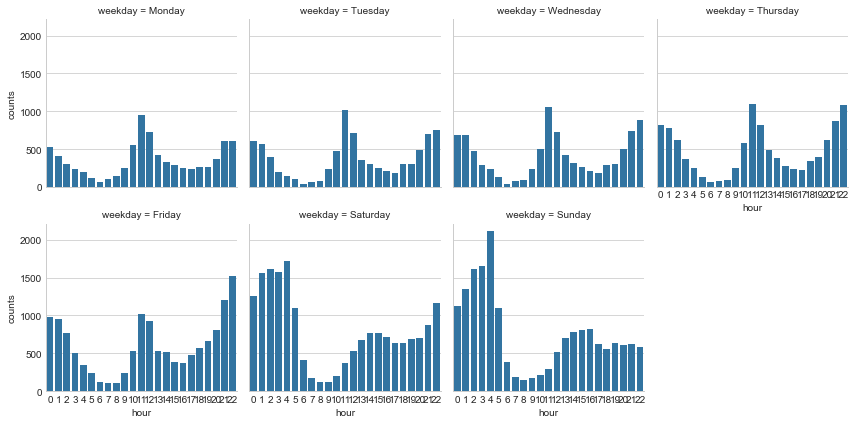

In [18]:
#groupby weekday and hour, plot
#https://stackoverflow.com/questions/54856726/pandas-how-to-group-by-and-plot-for-each-hour-of-each-day-of-week
#facetgrid made for this


fig = plt.figure(figsize=(40, 30))
# create facet grid
g = sns.FacetGrid(dayhour, col='weekday', col_order= weekday_order, col_wrap=4)

# map barplot to each subplot
g.map(sns.barplot, 'hour', 'counts', order = range (0,23))
#for the 24 hours

**As seen in the bar plot, daily logins are highest on Saturdays and Sundays indicating more use.  Further the top hours of use shown in the earlier plot were 12pm, 1pm, 10 pm and 2am.  When looking now at daily use, we see those hours of highest use are different, which is no surprise given the average person's weekday activities and weekend activities.  It is interesting to note the spike at the 4am hour early Monday morning.  Also the lowest usage seeming to be during 6am, 7am and 8am weekdays**

**PART 2 - EXPERIMENTS AND METRICS DESIGN**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

**1. A key measure of success to encourage driver partners to serve both cities would be to**
see growth in the weeknight activity for Ultimate Metropolis, and growth in the weekday
activity for Ultimate Gotham. It is reasonable to conclude that toll costs are affecting the
weekday activity if the reimbursement shows significant change. Further, it will be
interesting to see if this changes the weekend activity in cities. If that changes drastically
it will lead to more questions to be explored outside of toll, which could be more about
the cities themselves and their offerings.

**2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success.**

a. To implement the experiment there would need to be an initial set of data being
used for the initial statement about the differences. This set could be based on
monetary values or potentially number of rides requested. Exact monetary costs
per ride fluctuates, whereas the number of riders are set. There needs to be a
dataset over a period of time showing number of rides in each city, broken down
with dates and times. The experiment, once all tolls are getting reimbursed,
should be done for the same amount of time with the same drivers. The drivers
would continue business as usual, with no changes to the way they advertise or
connect to their service to get passengers.

b. To verify the significance of observation, a few tests could be used. Hypothesis
testing based on their hypothesis that the toll charges are affecting the activity in
each city. The z-test for this larger sample would work once established there is
a normal distribution from the Shapiro-Wilk test. Further, finding the significance
level and p=value. It would be good to use the Pearson test to check the linear
correlation of tolls to activity.

c. The results could require running a Shapiro-Wilk test of normality on each
dataset. This way the p-value can make a judgement about the normality of the
data. If it is not showing to be so, the data can be evaluated for nuisance
parameters and outliers, then adjusted to eliminate those causing the
fluctuations. The z-test would be used over the t-test due to the large size of the
sample, and determine whether to accept or reject the null hypothesis.
It would be wise to use seaborn plots and visuals such as a pair plot to show the
operations team the results from the initial data, compared to the data once the
tolls were taken out of the equation. Recommendations to the city could be
based on looking at the number of rides during times of day and days of the
week, grouping them into day and night activity as mentioned in the design.








**PART 3 -- PREDICTIVE MODELING**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

In [19]:
import numpy as np
import pandas as pd

from pandas.io.json import json_normalize 
import json

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed

**1.) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?**

In [20]:
with open('/Users/Sandi/Desktop/Projects/Mini_Projects/ultimate_challenge/ultimate_data_challenge.json') as f:
     #load data as JSON
    data = json.load(f)

#create df from JSON dataset
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


**Missing Values and Normalizing**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
#impute the mean ratings for drivers
df['avg_rating_of_driver'].fillna(np.mean(df.avg_rating_of_driver), inplace=True)
df['avg_rating_by_driver'].fillna(np.mean(df.avg_rating_by_driver), inplace=True)

#label missing phone data as 'other'
df['phone'].fillna('other', inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
#user retained if “active” (i.e. took a trip) in the preceding 30 days.
#parse dates
import datetime
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [25]:
df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [26]:
df.last_trip_date.sort_values(ascending=False)[0]

Timestamp('2014-06-17 00:00:00')

In [27]:
#30 days before last trip
s = '2014-06-17'
d = datetime.datetime.strptime(s, '%Y-%m-%d') - datetime.timedelta(days=30)
print(d.strftime('%m/%d/%Y'), 'Any user taking a trip on or after May 18th, 2014 will be considered active.  Those whose trip was May 17th or before, are inactive.')

05/18/2014 Any user taking a trip on or after May 18th, 2014 will be considered active.  Those whose trip was May 17th or before, are inactive.


In [28]:
#label target value column
df['active_or_not'] = (df.last_trip_date > '2014-05-17').astype(int)

In [29]:
df['active_or_not'].value_counts()

0    27255
1    22745
Name: active_or_not, dtype: int64

In [30]:
active = df['active_or_not'].loc[df['active_or_not'] == 1].value_counts()
active

1    22745
Name: active_or_not, dtype: int64

In [31]:
observed_users = df['active_or_not'].count()
observed_users

50000

In [32]:
#What fraction of the observed users were retained?
retained = active / observed_users
retained

1    0.4549
Name: active_or_not, dtype: float64

**1.)    There were 22,745 that were active out of the 50,000 observed users.  The fraction retained was 0.4549, approximately 46%.** 
The json file was converted to a dataframe.  The dates were then pared using datetime so to be readable as such.  The next task was to find the date of the last trip taken, followed by looking at what was 30 days prior to it.  This is where timedelta was used to discover the date of 05/18/2014.  Therefore, any user taking a trip on or after May 18th, 2014 will be considered active.  Those whose trip was May 17th or before, are inactive.

 

**2.) Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.**

**ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
**avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
**last_trip_date**: the last time this user completed a trip; in the form ‘YYYY MM DD’
**signup_date**: date of account registration; in the form ‘YYYY MM DD’


In [33]:
#handling the True False into 1 and 0
##ultimate_black_user needs to be changed from True False to 1 and 0
UB = []
for i in range(len(df)):
    if df['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
ultimate_black_user = pd.DataFrame(UB,columns = ['UB'])
ultimate_black_user.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [34]:
df['ultimate_black_user'] = ultimate_black_user
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_or_not
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [35]:
#signup_date has been parsed
#df.signup_date = pd.to_datetime(df.signup_date)
#group by the day for counts
df_day = time_df.groupby(df['signup_date'], as_index = True).sum()
df_day.head()

,counts,hour
signup_date,,
2014-01-01,3094,3846
2014-01-02,1859,1990
2014-01-03,2135,2517
2014-01-04,2604,3499
2014-01-05,2517,3039


"The process of identifying only the most relevant features is called “feature selection.”  Random Forests are often used for feature selection in a data science workflow...[]...pruning trees below a particular node, we can create a subset of the most important features. "  
https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

**Feature Selection Using Random Forest**

https://stackoverflow.com/posts/25149272/revisions
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
handle categorical columns.  date strings into three separate or eliminate
count each cities to see if important
count each of the phones to see if important
dummy variables--three columns for example, onehotencoding  #pandas

**LOGISTIC REGRESSION**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#Logistic Regression https://www.statisticssolutions.com/what-is-logistic-regression/ Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). ... 
#Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [37]:
#create the values for whether or not a user will be active in their 6th month on the system
##avg_rating_of_driver already has been handled for null values being replaced with averages
##signup_date already has been parsed


In [38]:
#fit model with all the features first.  Check importance, coefficients for elimination if not important

In [39]:
#x = df[['signup_date', 'avg_rating_of_driver','ultimate_black_user' ]]
#y = df
#y = df['active']

In [40]:
# Split the data into a training and test set.
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [41]:
#xtrain.shape

In [42]:
#ytrain.shape

In [43]:
#xtrain.size

In [44]:
#xtest.size

In [45]:
#ytrain.size

In [46]:
#ytest.size

In [47]:
# instantiate the model (using the default parameters)
#logreg = LogisticRegression(max_iter=1000)

In [48]:
# fit the model with data
#logreg.fit(xtrain,ytrain)

In [49]:
#sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#Standardize features by removing the mean and scaling to unit variance